# 基本信息统计
改革开放四十年，资本市场风风雨雨也有二十余载，我们的生活、工作甚至心情与股票市场的联系也越来越紧密。最近一则新闻报道上交所向中学生普及金融证券知识，网友评论道：“培养韭菜从娃娃抓起！”。言归正传，我们对A股上市公司到底认识多少？下面使用Python带领大家一步步进入探寻之旅。

## 获取数据
主要使用tushare包获取A股所有上市公司截至目前（2018年11月26日）的基本面数据，分析相关特征和可视化，挖掘数据背后隐藏的信息。

In [15]:
import pandas as pd
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

##925ada1b220d3a4bfa7e8307a04614a33315b0b415e50269dc4d52f8
#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False


#设置token
token='925ada1b220d3a4bfa7e8307a04614a33315b0b415e50269dc4d52f8'
pro = ts.pro_api(token)
basics_data=pro.stock_basic(list_status='L')
basics_data.to_csv('./data/basics_data.csv',encoding='gbk')

basics_data = pd.read_csv('./data/basics_data.csv',sep=",",encoding="gbk")
#查看前三行前8列数据
basics_data.iloc[:3]


,Unnamed: 0,ts_code,symbol,name,area,industry,market,list_date
0,0,000001.SZ,1,平安银行,深圳,银行,主板,19910403
1,1,000002.SZ,2,万科A,深圳,全国地产,主板,19910129
2,2,000004.SZ,4,ST国华,深圳,软件服务,主板,19910114


### 数据特征：
* code,代码；
* name,名称；
* industry,细分行业；
* area,地区；
* pe,市盈率；
* outstanding,流通股本；
* totals,总股本(万)；
* totalAssets,总资产(万)；
* liquidAssets,流动资产；
* fixedAssets,固定资产；
* reserved,公积金；
* reservedPerShare,每股公积金；
* eps,每股收益；
* bvps,每股净资；
* pb,市净率；
* timeToMarket,上市日期；
* undp 未分配利润；
* perundp 每股未分配；
* rev 收入同比（%）；
* profit 利润同比（%）；
* gpr 毛利率（%）；
* npr 净利润率（%）；
* holders_num 股东人数

## 上市公司分布

In [16]:
#使用groupby对上市公司归属地进行汇总，
#统计每个省份（直辖市）上市公司的总数
area = basics_data.groupby('area')['name'].count()
#从大到小进行排序，取出前十名
area.sort_values(ascending=False)[:10]

area
浙江    623
江苏    595
北京    433
广东    404
上海    401
深圳    386
山东    266
福建    165
四川    162
安徽    152
Name: name, dtype: int64

In [17]:
area['广东'] =  area['广东'] + area['深圳']
area.drop(['深圳'],inplace=True)
area.sort_values(ascending=False)[:10]

area
广东    790
浙江    623
江苏    595
北京    433
上海    401
山东    266
福建    165
四川    162
安徽    152
湖南    132
Name: name, dtype: int64

/Users/robinyu/.local/share/virtualenvs/JupyterNotebook-5PCSqSH0/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/robinyu/.local/share/virtualenvs/JupyterNotebook-5PCSqSH0/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/robinyu/.local/share/virtualenvs/JupyterNotebook-5PCSqSH0/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20844 (\N{CJK UNIFIED IDEOGRAPH-516C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/robinyu/.local/share/virtualenvs/JupyterNotebook-5PCSqSH0/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21496 (\N{CJK UNIFIED IDEOGRAPH-53F8}) missing from current font.
  fig.canvas.print_figure(bytes_io

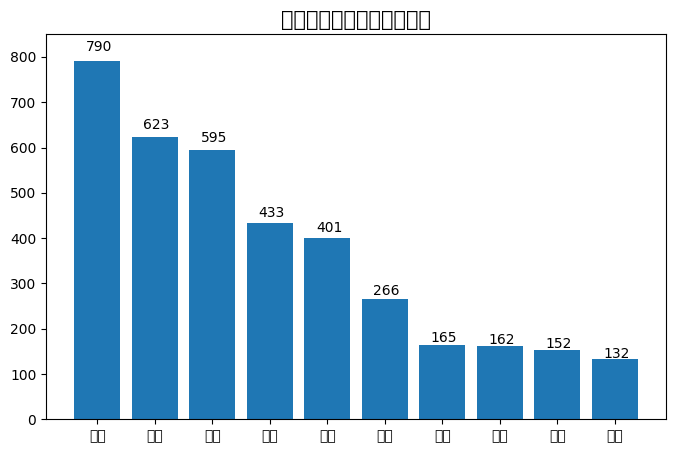

In [23]:
#定义显示数值标签函数
def autolabel(fig):
    for f in fig:
        height = f.get_height()
        plt.text(f.get_x()+f.get_width()/2.-0.2, 
                 1.03*height, '%s' % int(height))   
area_top=area.sort_values(ascending=False)[:10]
d=dict(area_top)
plt.figure(figsize=(8,5))
fig=plt.bar(d.keys(), d.values())
autolabel(fig)   
plt.title("上市公司总数排名前十省份",fontsize=15)
plt.ylim(0,850)
plt.show()
#注意，数据不包含港澳台

In [24]:
top5 = (area.sort_values(ascending=False)[:5].sum()/area.sum()) * 100
top10 = (area.sort_values(ascending=False)[:10].sum()/area.sum()) * 100
print("前五个省份上市公司总数占比{:.2f}%".format(top5))
print("前十个省份上市公司总数占比{:.2f}%".format(top10))

前五个省份上市公司总数占比59.32%
前十个省份上市公司总数占比77.62%


In [25]:
#对上市公司的总资产根据地区分类汇总
totalAssets=basics_data.groupby('area')['totalAssets'].sum()
#单位转换为万亿元，保留四位小数
totalAssets=round(totalAssets/10**8,4) 
#排序选出前十大省市
totalAssets.sort_values(ascending=False)[:10]

KeyError: 'Column not found: totalAssets'